<h1> The Lorenz System </h1>
<p> The Lorenz system is a set of ordinary differential equations studied by the father of modern mathematical meteorology, Edward Lorenz. He developed it as a model for atmospheric convection, the movement of parcels of air in the atmosphere due to differences in atmospheric variables such as temperature. </p>
<p> Atmospheric convection often takes the form of a process known as convective overturning, via which warm air rises, cools and falls back to earth in a cyclical, "overturning" motion:</p>

<img src="./convection.png"/>

<p>(Image taken from <a href="https://energyeducation.ca/encyclopedia/Convection"> this website </a> which has some good information on this topic.) </p>

<p> The Lorenz System is interesting from a mathematical point of view because it is a foundational system in the modern branch of mathematics known as Chaos Theory, the study of dynamical systems that display seemingly random disorder. Chaotic systems only "seem" random. They actually evolve according to deterministic laws but are so sensitive that a small difference in input will result in a very different output. This has been popularized by the phenomenon as the "butterfly effect", a metaphor that illustrates this concept by saying a butterly flapping its wings in Brazil can cause a tornado in Texas. The Lorenz attractor is a set of chaotic solutions for the Lorenz system. </p>

<p> The Lorenz system to describe the atmospheric convection of a parcel of air is defined by the following set of ODEs: </p>

$$ \large{\frac{dx}{dt} = \sigma ( y - x)}$$
$$ \large{\frac{dy}{dt} = x ( \rho - z) - y}$$
$$ \large{\frac{dz}{dt} = xy - \beta z}$$

<p> Here the first equation describes the parcel's motion in the x direction, the second equation describes the parcel's motion in the y direction, and the third equation describes the parcel's motion in the z direction. The variables $\sigma,\rho,\beta$ are physical constants based on the properties of the air parcel.</p>

<p> Let's make some plots in python to visualize some Lorenz attractor solutions: </p>

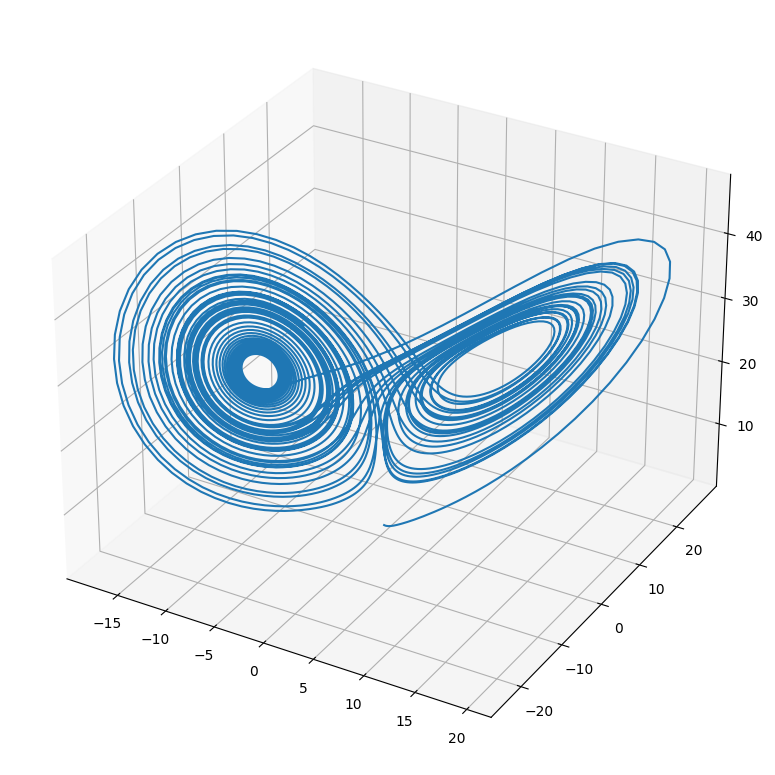

In [35]:
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

#original constants used for Lorenz's chaotic solution
sigma = 10
rho = 28
beta = 8/3

"""
t is time
r is the state vector we are iterating on
"""
def lorenz(t,r):
    x, y, z = r
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return np.array([dx,dy,dz],float)

#compute solution
r0 = [0,1.0,1.0]
tspan = [0,50]
t_vec = np.linspace(0,50,5000)
sol = solve_ivp(lorenz,tspan,r0,t_eval=t_vec)

#plot the computed solution
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.plot3D(sol.y[0,:], sol.y[1,:], sol.y[2,:])
plt.show()

<p> That looks pretty cool! Let's do a couple of trajectories starting
from slightly different points to show the divergence (chaotic behaviour) </p>

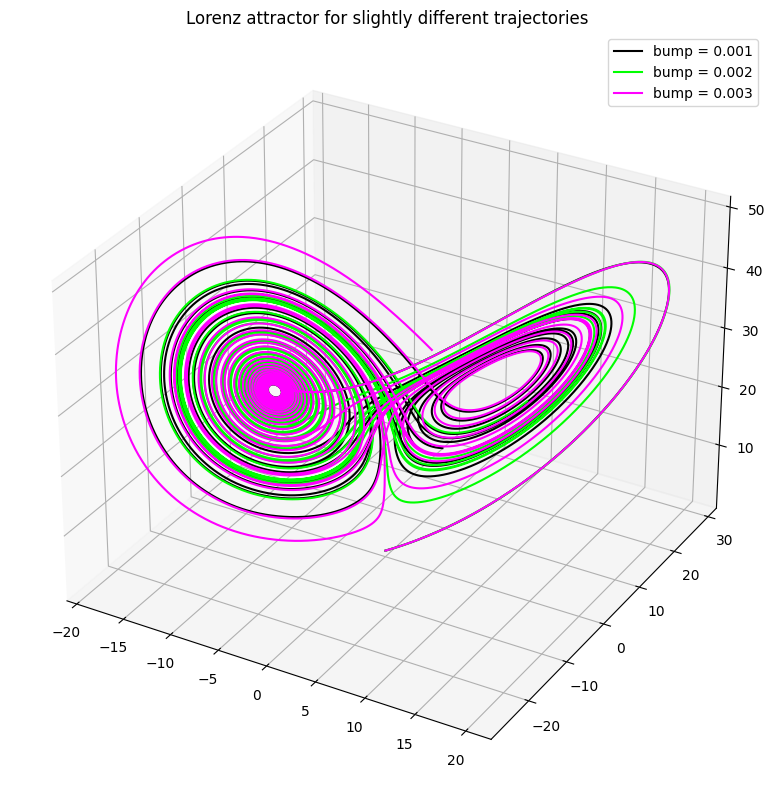

In [46]:
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

#Slightly modify original constants used for Lorenz's chaotic solution
sigma = 9
rho = 29
beta = 7/3

"""
t is time
r is the state vector we are iterating on
"""
def lorenz(t,r):
    x, y, z = r
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return np.array([dx,dy,dz],float)

def plot_lorenz(r0,t_len,step_size,plotcolor):
    tspan = [0,t_len]
    num_steps = int(t_len/step_size)
    t_vec = np.linspace(0,t_len,num_steps)
    sol = solve_ivp(lorenz,tspan,r0,t_eval=t_vec)
    ax.plot3D(sol.y[0,:], sol.y[1,:], sol.y[2,:],label="bump = {}".format(r0[0]),color=plotcolor)

#set up axis
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(projection='3d')
#pretty colorscheme
colorvec=[None,"black","lime","magenta","yellow"]

for i in range(1,4):
    #compute solution and plot
    bump = i*(1e-3)
    r0 = [bump,bump,bump]
    plot_lorenz(r0,30,0.001,colorvec[i])
    
#now show
plt.title("Lorenz attractor for slightly different trajectories")
plt.legend()
plt.show()